In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## The `rcParams` Object

All of matplotlib's settings are stored in a global dict (or, more accurately, `dict` like object) called `rcParams` on the `matplotlib` module. The code below, displays this collection of default settings for us to peruse.

In [2]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter

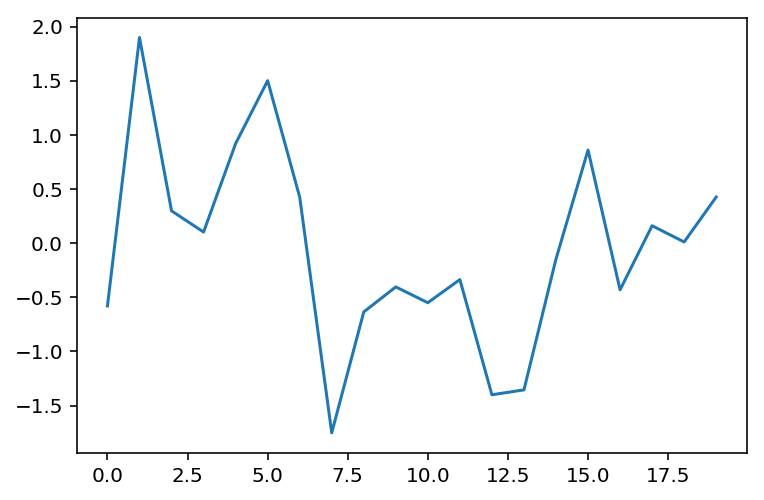

In [3]:
plt.plot(np.random.randn(20));

## Configuring matplotlib

In [4]:
for key, val in mpl.rcParams.items():
    if key.startswith('lines.'):
        print ('%-40s:%s' % (key, val))

lines.antialiased                       :True
lines.color                             :C0
lines.dash_capstyle                     :butt
lines.dash_joinstyle                    :round
lines.dashdot_pattern                   :[6.4, 1.6, 1.0, 1.6]
lines.dashed_pattern                    :[3.7, 1.6]
lines.dotted_pattern                    :[1.0, 1.65]
lines.linestyle                         :-
lines.linewidth                         :1.5
lines.marker                            :None
lines.markeredgewidth                   :1.0
lines.markersize                        :6.0
lines.scale_dashes                      :True
lines.solid_capstyle                    :projecting
lines.solid_joinstyle                   :round


In [5]:
mpl.rcParams['lines.linewidth'] = 10

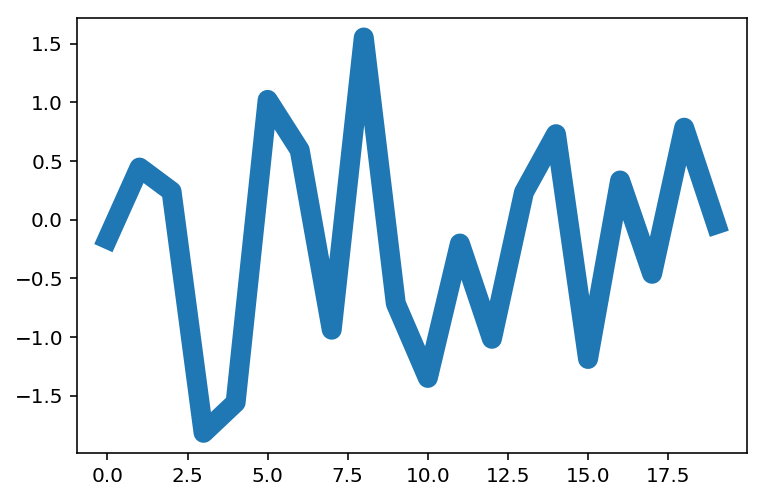

In [6]:
plt.plot(np.random.randn(20));

In [7]:
mpl.rc('lines', linewidth=2, linestyle='--', marker='s')

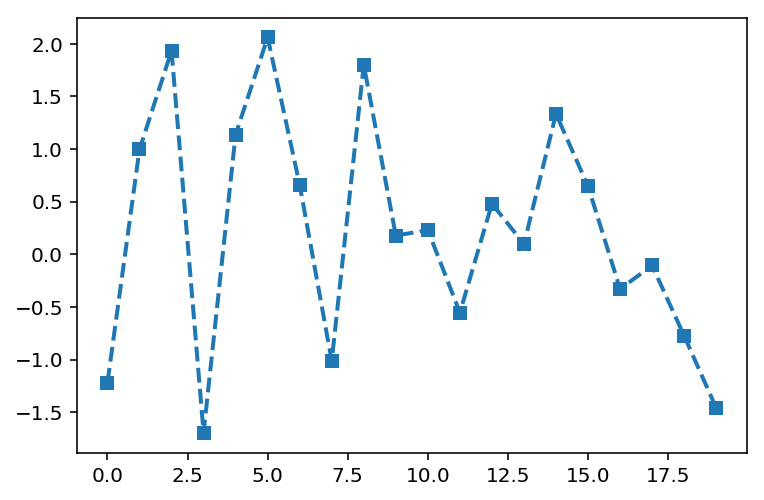

In [8]:
plt.plot(np.random.randn(20));

## The matplotlibrc File

The `matplotlibrc` file can be stored in one of four different locations and matplotlib will look for this file in each location in the following order:

- First, you can add the file to your current working directory to give the current project its own specific custom set of properties. 

- Second, you can define the environment variable `$MATPLOTLIBRC` to the hold a directory where you would like to keep your global `matplotlibrc` file. 

- Next, you can place the file in your default config directory, which you can get by calling the `get_configdir` function. 

- Finally, if matplotlib cannot find a `matplotlibrc` file in one of these locations, it will load the file that was installed with matplotlib. 

This last location is the home of the default configuration file that comes with a standard matplotlib installation and you should never make any changes directly to it, but that doesn't mean that you can't take a look at its contents to get an idea of what a `matplotlibrc` file looks like. 

We can find this file by calling the `matplotlib_fname` function. This function will return the location of the file currently being used, and since we are currently using the default settings that matplotlib ships with, this should return the location of the default `matplotlibrc` file.

In [9]:
mpl.matplotlib_fname()

'/Users/haolu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [10]:
!cat {mpl.matplotlib_fname()}

#### MATPLOTLIBRC FORMAT

## This is a sample matplotlib configuration file - you can find a copy
## of it on your system in
## site-packages/matplotlib/mpl-data/matplotlibrc.  If you edit it
## there, please note that it will be overwritten in your next install.
## If you want to keep a permanent local copy that will not be
## overwritten, place it in the following location:
## unix/linux:
##      $HOME/.config/matplotlib/matplotlibrc or
##      $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
## other platforms:
##      $HOME/.matplotlib/matplotlibrc
##
## See http://matplotlib.org/users/customizing.html#the-matplotlibrc-file for
## more details on the paths which are checked for the configuration file.
##
## This file is best viewed in a editor which supports python mode
## syntax highlighting. Blank lines, or lines starting with a comment
## symbol, are ignored, as are trailing comments.  Other lines must
## have the format
##     key : val ## optional comment


In [11]:
import os

matplotlibrc_location = os.path.join(mpl.get_configdir(), 'matplotlibrc')
matplotlib_content = """
lines.marker                : s
lines.linestyle             : --
lines.linewidth             : 2.0
"""

with open(matplotlibrc_location, 'w') as fout:
    fout.write(matplotlib_content.strip())

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Now, if we call the `matploblib_fname` function again, we should see that matplotlib is now using our own `matplotlibrc` file that we just created, so let's give that a try now.

In [13]:
mpl.matplotlib_fname()

'/Users/haolu/.matplotlib/matplotlibrc'

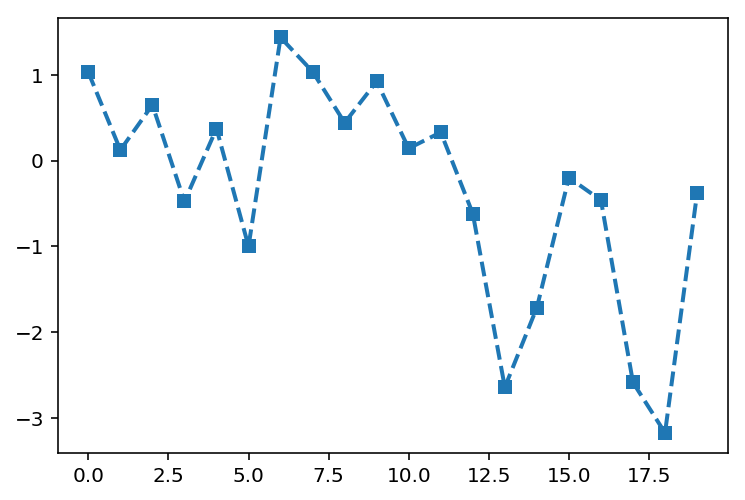

In [14]:
plt.plot(np.random.randn(20));

### Cleaning Up

In [15]:
os.remove(matplotlibrc_location)